In [30]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
%matplotlib widget
import matplotlib.pyplot as plt
from src.utils import set_axes_equal

In [16]:
def compute_rotation_matrix(A, B):
    H = A.T @ B
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = Vt.T @ U.T
    return R


In [21]:
data = pd.read_csv("/Users/jannik/Repos/demonstration-interface/data/Trial2.csv", skiprows=5, header=0)
    
# Rename columns for better understanding
columns = [
    'Frame', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
    'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5',
    'Mag_X1', 'Mag_Y1', 'Mag_Z1', 'Mag_X2', 'Mag_Y2', 'Mag_Z2'
]
data.columns = columns

# Extract marker coordinates
marker_columns = ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5']
markers = data[marker_columns].values
markers = markers.reshape(-1, 5, 3)

# Calculate the centroid (center of the rigid body)
centroid = np.mean(markers, axis=1)

# Define a reference frame using the initial positions of the markers
reference_markers = markers[0]

# Compute the rotation matrix for each frame
rotation_matrices = []
for i in range(markers.shape[0]):
    R_i = compute_rotation_matrix(reference_markers, markers[i])
    rotation_matrices.append(R_i)

rotation_matrices = np.array(rotation_matrices)


In [42]:
centroid.shape

(2417, 3)

In [41]:
rotation_matrices.shape

(2417, 3, 3)

In [35]:
len(centroid)/100 #Hz

24.17

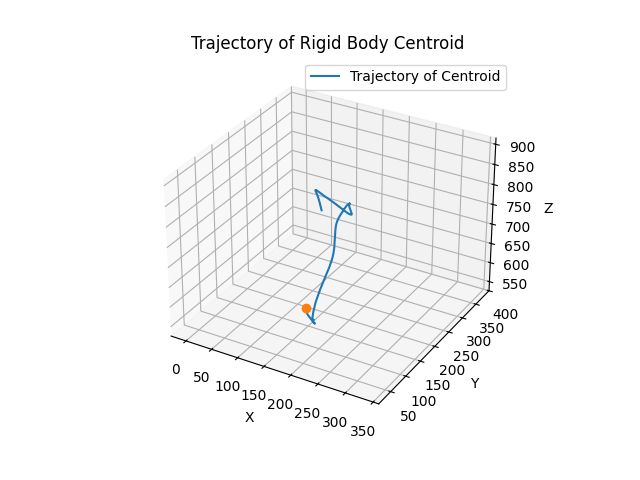

In [38]:
# Visualize the trajectory of the centroid
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(centroid[:600, 0], centroid[:600, 1], centroid[:600, 2], label='Trajectory of Centroid')
ax.plot(centroid[0, 0], centroid[0, 1], centroid[0, 2], marker="o")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
set_axes_equal(ax)
ax.set_title('Trajectory of Rigid Body Centroid')
plt.legend()
plt.show()

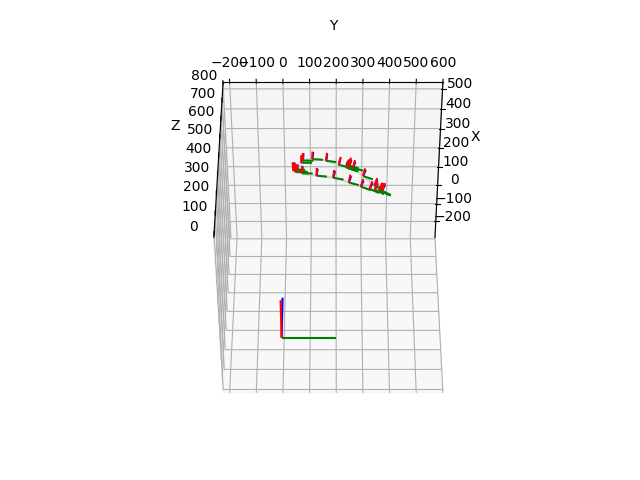

In [61]:
translations = centroid[:700]
orientations = rotation_matrices[:700]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')    
ax.set_box_aspect([1.0, 1.0, 1.0])
    
# Plot trajectory
ax.plot(translations[:, 0], translations[:, 1], translations[:, 2], '-', c="lightgrey", label='Trajectory')

translations = translations[::20]
orientations = orientations[::20]

# Plot orientation arrows
for i in range(len(translations)):
    t = translations[i]
    R = orientations[i]
    # R = np.dot(R_z, orientations[i])
    ax.quiver(t[0], t[1], t[2], R[0, 0], R[1, 0], R[2, 0], length=40, color='r', arrow_length_ratio=0)
    ax.quiver(t[0], t[1], t[2], R[0, 1], R[1, 1], R[2, 1], length=40, color='g', arrow_length_ratio=0)
    ax.quiver(t[0], t[1], t[2], R[0, 2], R[1, 2], R[2, 2], length=40, color='b', arrow_length_ratio=0)
    
ax.quiver(0,0,0, 1, 0, 0, length=200, color='r', arrow_length_ratio=0)
ax.quiver(0,0,0, 0,1,0, length=200, color='g', arrow_length_ratio=0)
ax.quiver(0,0,0, 0,0,1, length=200, color='b', arrow_length_ratio=0)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
    
ax.grid(True)
ax.view_init(elev=-45, azim=0, roll=0)

set_axes_equal(ax)
plt.show()